# wrangling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline


## Read Data

In [ ]:
Trained_Data  = pd.read_csv("/content/KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("/content/KDDTest+.txt" , sep = "," , encoding = 'utf-8')

## Exploring data

In [ ]:
Trained_Data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21.0


In [ ]:
Tested_Data.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])


In [ ]:
Trained_Data.columns = Columns
Tested_Data.columns  = Columns

In [ ]:
Trained_Data.head(10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21.0
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21.0
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21.0
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21.0
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21.0
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21.0


In [ ]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


In [ ]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55295 entries, 0 to 55294
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     55295 non-null  int64  
 1   protocol_type                55295 non-null  object 
 2   service                      55295 non-null  object 
 3   flag                         55295 non-null  object 
 4   src_bytes                    55295 non-null  int64  
 5   dst_bytes                    55295 non-null  int64  
 6   land                         55295 non-null  int64  
 7   wrong_fragment               55295 non-null  int64  
 8   urgent                       55295 non-null  int64  
 9   hot                          55295 non-null  int64  
 10  num_failed_logins            55295 non-null  int64  
 11  logged_in                    55295 non-null  int64  
 12  num_compromised              55295 non-null  int64  
 13  root_shell      

In [ ]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [ ]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,55295.000000,5.529500e+04,5.529500e+04,55295.000000,55295.000000,55295.000000,55295.000000,55295.000000,55295.000000,55295.000000,...,55294.000000,55294.000000,55294.000000,55294.000000,55294.000000,55294.000000,55294.000000,55294.000000,55294.000000,55294.000000
mean,297.689104,4.830888e+04,3.134924e+03,0.000127,0.021810,0.000072,0.200217,0.001121,0.393706,0.205227,...,114.897801,0.519202,0.082875,0.148785,0.032520,0.286904,0.280945,0.118543,0.120001,19.487847
std,2655.132203,5.857901e+06,7.773306e+04,0.011251,0.249269,0.013448,2.136634,0.044588,0.488575,10.245167,...,110.668335,0.449368,0.188105,0.310002,0.112318,0.445863,0.446837,0.306200,0.318996,2.314014
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.500000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42862.000000,1.167519e+09,5.153771e+06,1.000000,3.000000,3.000000,77.000000,4.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
Tested_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
Trained_Data.nunique()

duration                       1497
protocol_type                     3
service                          68
flag                             11
src_bytes                      2411
dst_bytes                      6184
land                              2
wrong_fragment                    3
urgent                            3
hot                              24
num_failed_logins                 5
logged_in                         2
num_compromised                  45
root_shell                        2
su_attempted                      3
num_root                         39
num_file_creations               29
num_shells                        3
num_access_files                  9
num_outbound_cmds                 1
is_host_login                     1
is_guest_login                    2
count                           508
srv_count                       480
serror_rate                      83
srv_serror_rate                  72
rerror_rate                      76
srv_rerror_rate             

In [ ]:
Tested_Data.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [ ]:
Trained_Data.max()


duration                            42862
protocol_type                         udp
service                             whois
flag                                   SH
src_bytes                      1167519497
dst_bytes                         5153771
land                                    1
wrong_fragment                          3
urgent                                  3
hot                                    77
num_failed_logins                       4
logged_in                               1
num_compromised                       884
root_shell                              1
su_attempted                            2
num_root                              975
num_file_creations                     40
num_shells                              2
num_access_files                        8
num_outbound_cmds                       0
is_host_login                           0
is_guest_login                          1
count                                 511
srv_count                         

In [ ]:
Trained_attack = Trained_Data.attack.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = Tested_Data.attack.map(lambda a: 0 if a == 'normal' else 1)

Trained_Data['attack_state'] = Trained_attack
Tested_Data['attack_state'] = Tested_attack


In [ ]:
Trained_Data.head(10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15.0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19.0,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21.0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21.0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21.0,1
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21.0,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21.0,1
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21.0,1
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21.0,1
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21.0,1


## Data preprocessing¶


In [ ]:
Trained_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                1
same_srv_rate                  1
diff_srv_rate                  1
srv_diff_h

In [ ]:
Tested_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
Trained_Data.duplicated().sum()

0

In [ ]:
Trained_Data.shape


(55295, 44)

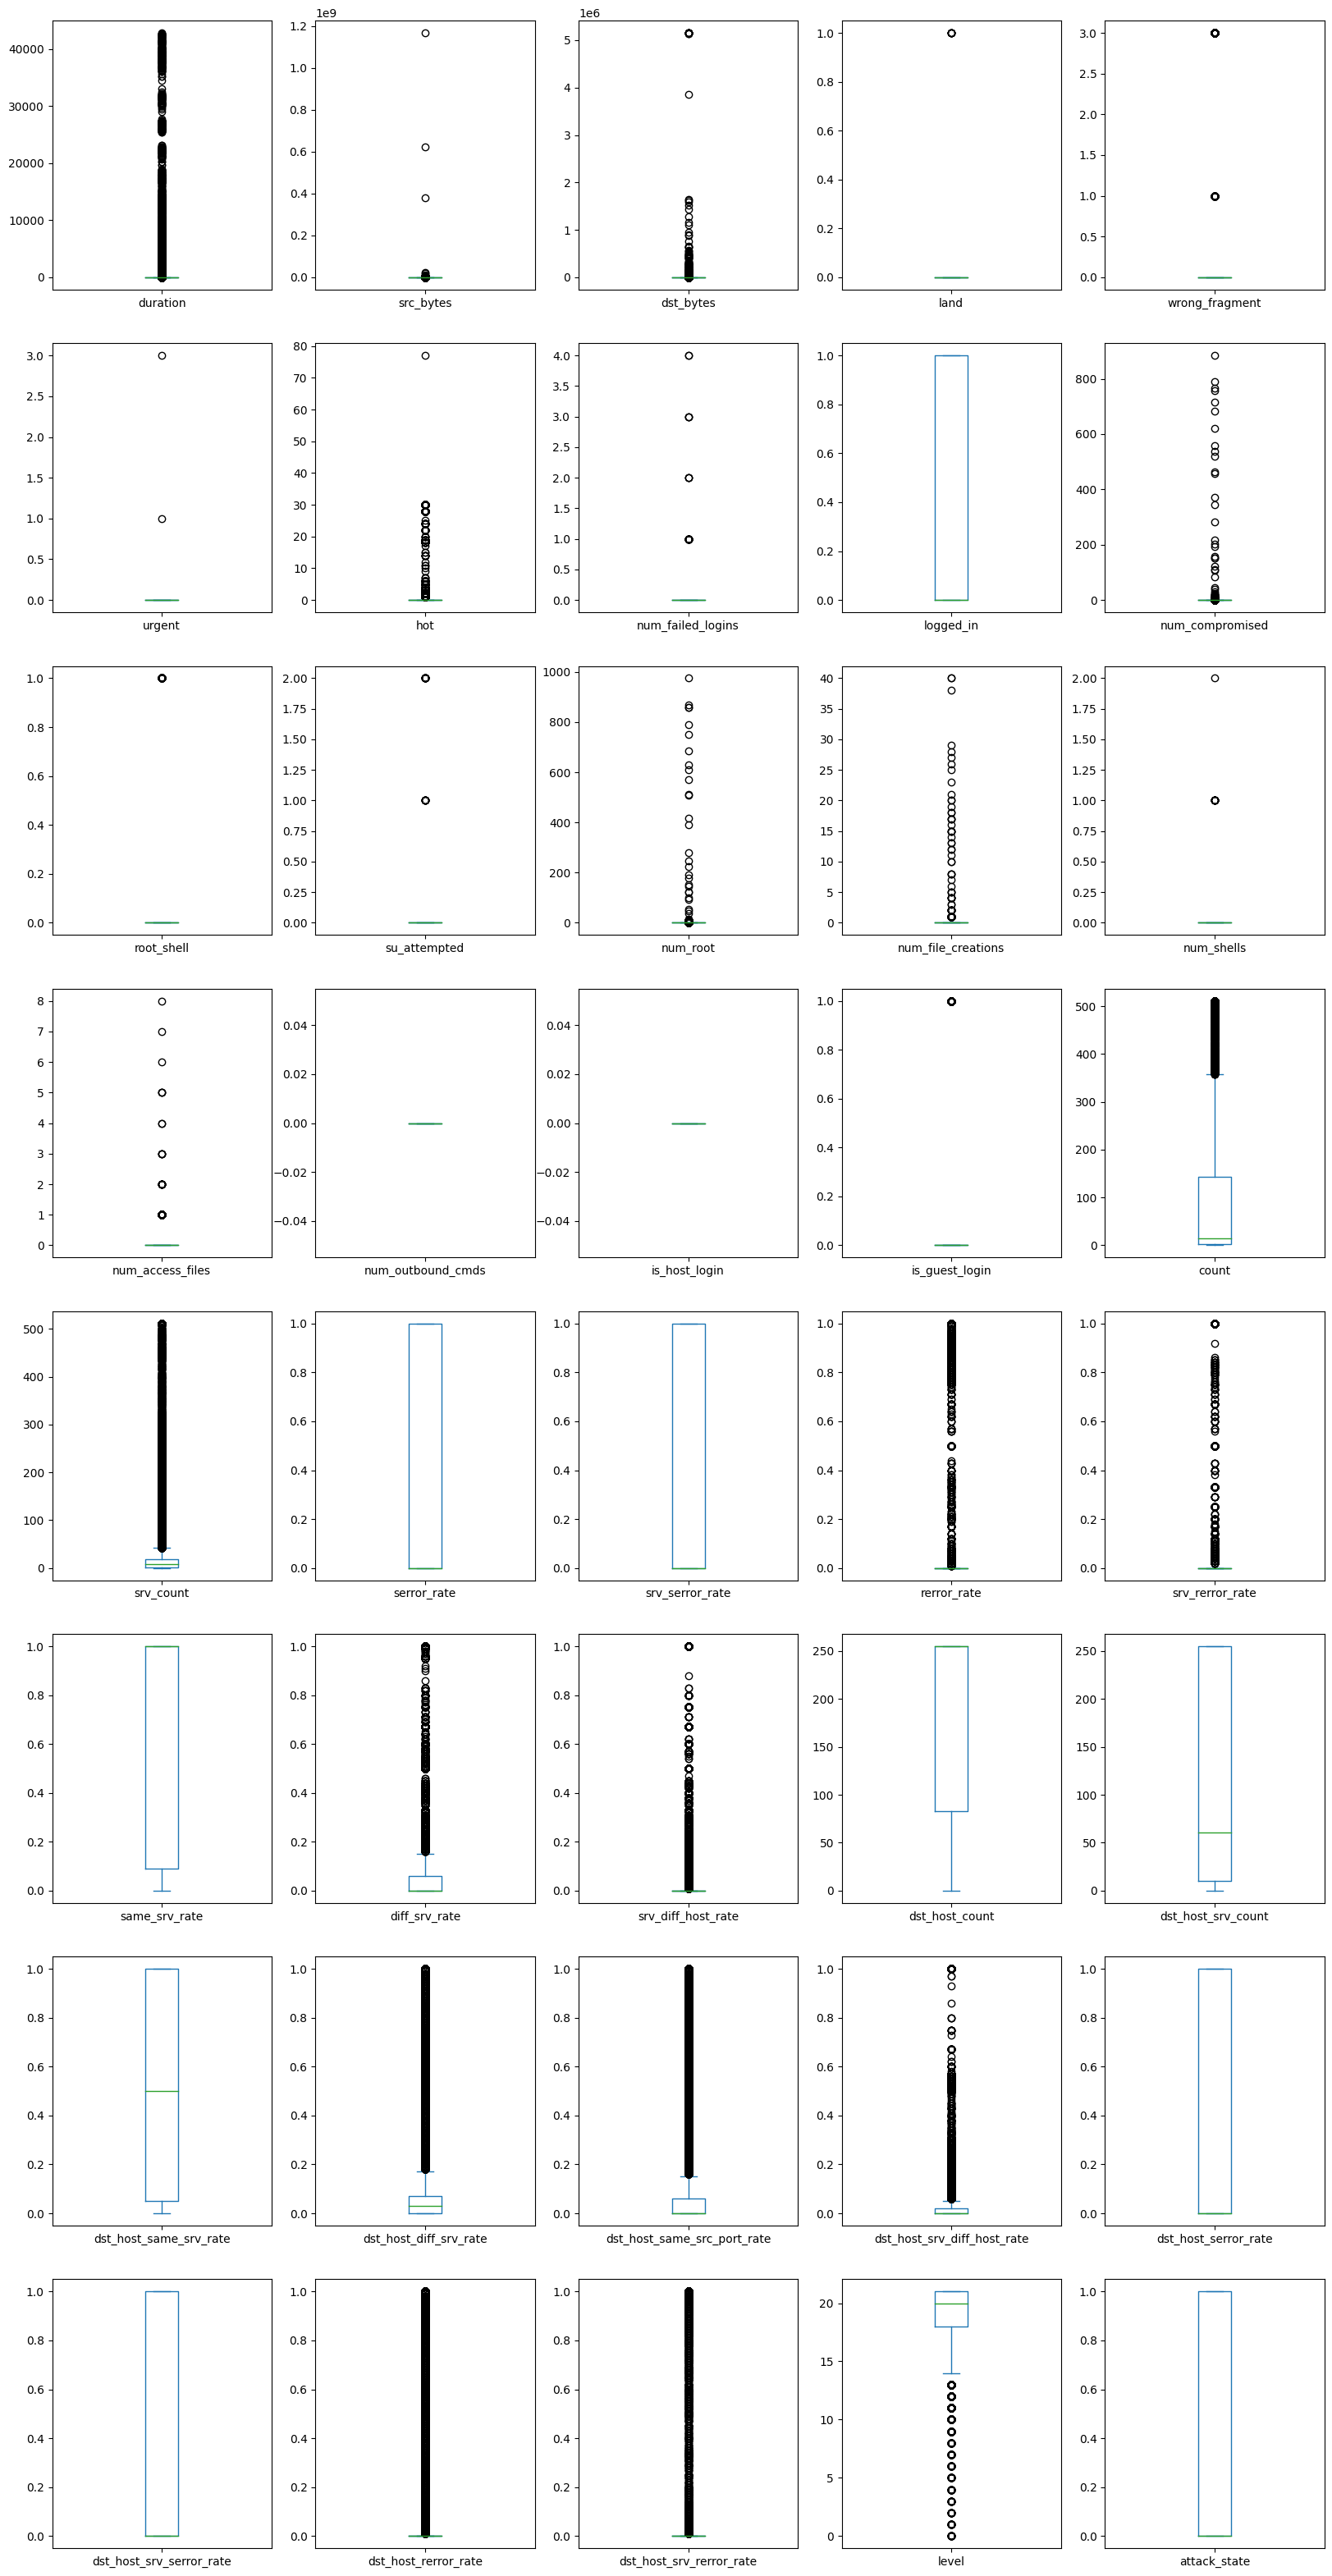

In [ ]:
Trained_Data.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()


In [ ]:
Tested_Data.shape

(22543, 44)

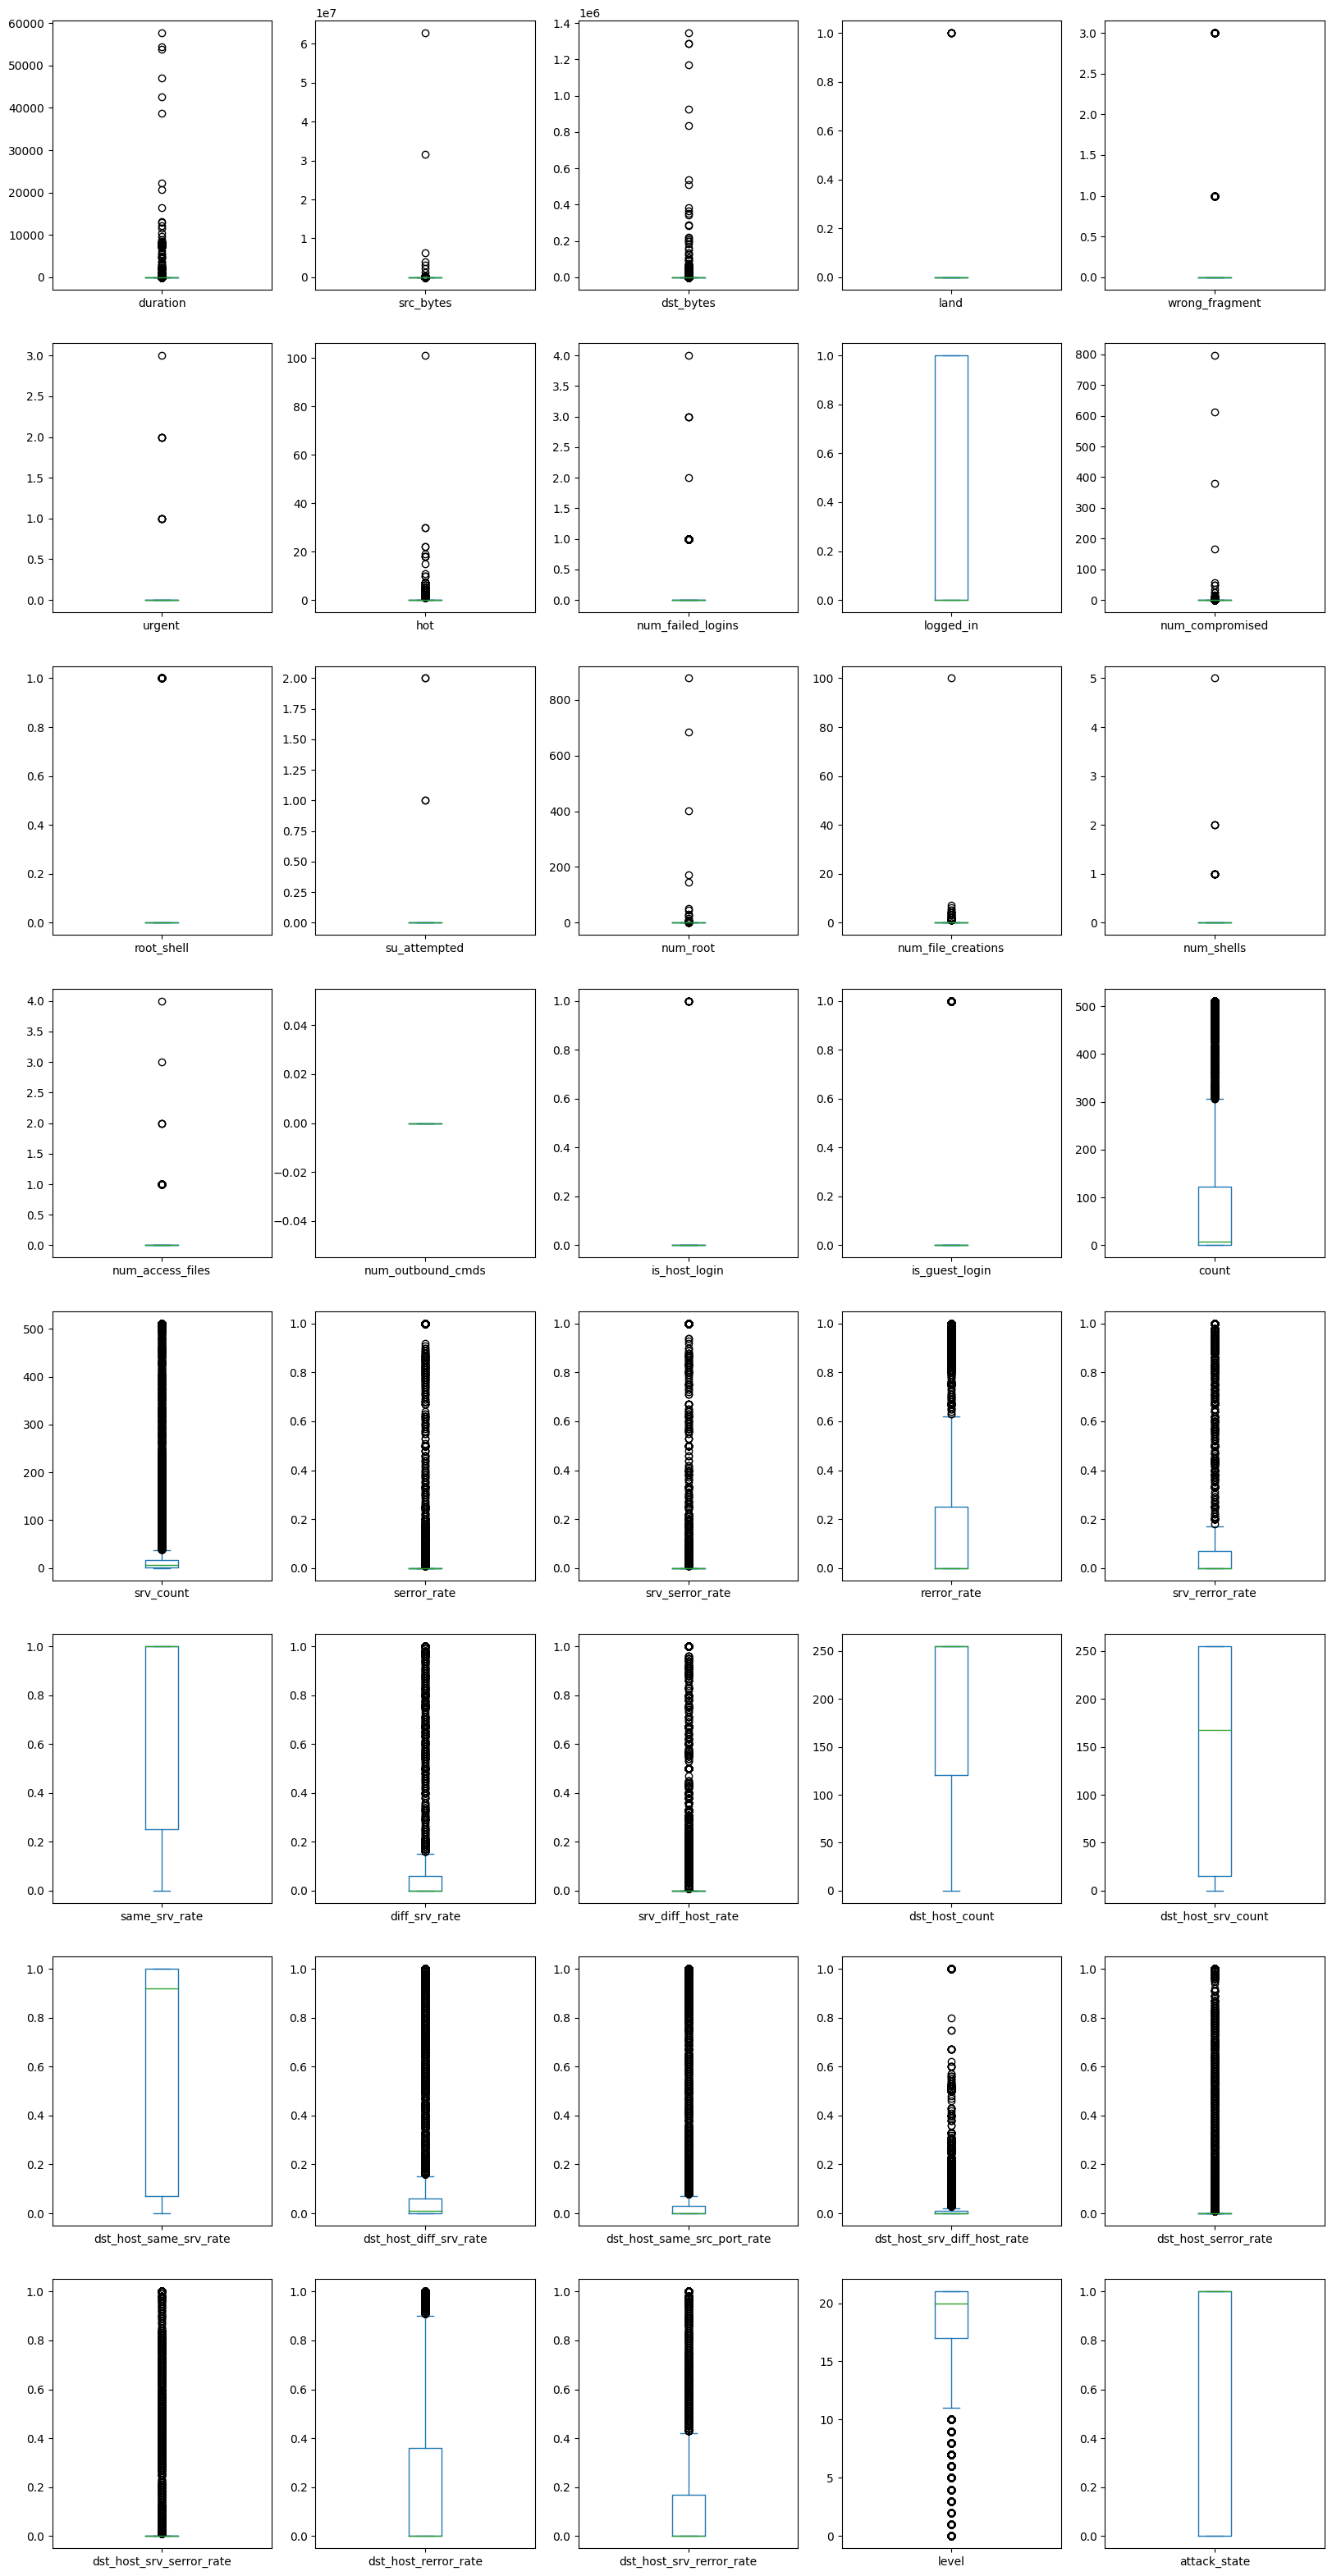

In [ ]:
Tested_Data.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

# **Data Encoding**

In [ ]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")


In [ ]:
Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [ ]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])

# **Data Splitting**


In [ ]:
for column in Trained_Data.columns:
    clean_column_name = column.strip()
    print(clean_column_name)

duration
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
attack
level
attack_state
icmp
tcp
udp
IRC
X11
Z39_50
aol
auth
bgp
courier
csnet_ns
ctf
daytime
discard
domain
domain_u
echo
eco_i
ecr_i
efs
exec
finger
ftp
ftp_data
gopher
hostnames
http
http_2784
http_443
http_8001
imap4
iso_tsap
klogin
kshell
ldap
link
login
mtp
name
netbios_dgm
netbios_ns
netbios_ssn
netstat
nnsp
nntp
ntp_u
other
pm_dump
pop_2
pop_3
printer
private
red_i
remote_job
rje
shell
smtp
sql_net
ssh
sunrpc

In [ ]:
Trained_Data['attack_state'].value_counts()

0    29377
1    25918
Name: attack_state, dtype: int64

In [ ]:
timesteps = 50
input_features = 125

In [ ]:
X_train = Trained_Data.drop('attack', axis = 1)
X_train = Trained_Data.drop('level', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

X_test = Tested_Data.drop('attack', axis = 1)
X_test = Tested_Data.drop('level', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)


Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']

In [ ]:
X_train_train,X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

# **Data Scaling**

In [ ]:
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train)
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test)
X_test_test= Ro_scaler.transform(X_test_test)

In [ ]:
X_train_train.shape

(41471, 122)

In [ ]:
X_test_train.shape

(13824, 122)

In [ ]:
Y_train_train.shape

(41471,)

In [ ]:
Y_test_train.shape

(13824,)

# Working on Trained Data

In [ ]:
print(np.isnan(X_train).sum())

duration          0
src_bytes         0
dst_bytes         0
land              0
wrong_fragment    0
                 ..
S1                0
S2                0
S3                0
SF                0
SH                0
Length: 122, dtype: int64


In [ ]:
print(np.isinf(X_train).sum())

duration          0
src_bytes         0
dst_bytes         0
land              0
wrong_fragment    0
                 ..
S1                0
S2                0
S3                0
SF                0
SH                0
Length: 122, dtype: int64


In [ ]:
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))

In [ ]:
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))


In [ ]:
A = sm.add_constant(X_train)
Est1 = sm.GLM(Y_train, A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:                55295
Model:                            GLM   Df Residuals:                    55178
Model Family:                Gaussian   Df Model:                          116
Link Function:               Identity   Scale:                        0.022218
Method:                          IRLS   Log-Likelihood:                 26848.
Date:                Thu, 07 Sep 2023   Deviance:                       1226.0
Time:                        13:49:08   Pearson chi2:                 1.23e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0221      0.010    101.369      0.000       1.002       1.042
x1         -4.693e-06   2.99e-07    -15.671      0.000   -5.28e-06   -4.11e-06
x2          1.526e-10   1.13e-10      1.354      0.176   -6.83e-11    3.74e-10
x3          5.712e-08    8.3e-09      6.882      0.000    4.09e-08    7.34e-08
x4            -0.6585      0.057    -11.524      0.000      -0.771      -0.547
x5             0.1509      0.003     48.270      0.000       0.145       0.157
x6            -0.0667      0.048     -1.385      0.166      -0.161       0.028
x7             0.0126      0.001     21.662      0.000       0.011       0.014
x8            -0.0251      0.015     -1.674      0.094      -0.054       0.004
x9             0.1531      0.005     30.381      0.000       0.143       0.163
x10            0.0143      0.001     10.192      0.000       0.012       0.017
x11           -0.0423      0.021     -2.058      0.040      -0.083      -0.002
x12           -0.1563      0.026     -6.032      0.000      -0.207      -0.105
x13           -0.0126      0.001     -9.926      0.000      -0.015      -0.010
x14           -0.0097      0.001     -7.619      0.000      -0.012      -0.007
x15           -0.1233      0.034     -3.674      0.000      -0.189      -0.058
x16           -0.0017      0.009     -0.181      0.856      -0.020       0.016
x17        -5.094e-16   1.58e-16     -3.229      0.001   -8.19e-16      -2e-16
x18         -1.01e-15   2.21e-16     -4.564      0.000   -1.44e-15   -5.76e-16
x19           -0.2941      0.017    -17.784      0.000      -0.326      -0.262
x20            0.0003   1.35e-05     19.215      0.000       0.000       0.000
x21            0.0001   2.01e-05      5.647      0.000     7.4e-05       0.000
x22            0.0653      0.016      4.060      0.000       0.034       0.097
x23            0.2534      0.017     14.944      0.000       0.220       0.287
x24            0.0978      0.016      6.288      0.000       0.067       0.128
x25            0.1704      0.015     11.313      0.000       0.141       0.200
x26           -0.3919      0.006    -71.057      0.000      -0.403      -0.381
x27           -0.1574      0.005    -29.033      0.000      -0.168      -0.147
x28            0.0531      0.003     16.658      0.000       0.047       0.059
x29            0.0003   9.91e-06     30.315      0.000       0.000       0.000
x30           -0.0004   1.79e-05    -19.963      0.000      -0.000      -0.000
x31           -0.0103      0.005     -1.929      0.054      -0.021       0.000
x32            0.1586      0.006     25.090      0.000       0.146       0.171
x33            0.1248      0.004     31.463      0.000       0.117       0.133
x34            0.0221      0.009      2.559      0.010       0.005       0.039
x35           -0.1036      0.010    -10.832      0.000      -0.122      -0.085
x3

# **simple RNN model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split


In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Reshape((X_train_train.shape[1], 1), input_shape=(X_train_train.shape[1],)),
    keras.layers.SimpleRNN(64, activation='relu'),
    keras.layers.Dense(32, activation='relu')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 122, 1)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
Total params: 6,304
Trainable params: 6,304
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train your model with the new split
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_val, Y_val))
#history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_val, Y_val))
#history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_val, Y_val))


Epoch 1/20
1383/1383 [==============================] - 36s 25ms/step - loss: 1.7646 - accuracy: 0.0235 - val_loss: 1.5353 - val_accuracy: 0.1857
Epoch 2/20
1383/1383 [==============================] - 31s 22ms/step - loss: 1.4504 - accuracy: 5.8776e-04 - val_loss: 1.4424 - val_accuracy: 0.0000e+00
Epoch 3/20
1383/1383 [==============================] - 33s 24ms/step - loss: 1.3746 - accuracy: 0.0022 - val_loss: 1.1000 - val_accuracy: 0.0444
Epoch 4/20
1383/1383 [==============================] - 30s 21ms/step - loss: 0.8005 - accuracy: 0.0419 - val_loss: 0.4300 - val_accuracy: 0.0654
Epoch 5/20
1383/1383 [==============================] - 34s 24ms/step - loss: 0.5157 - accuracy: 0.1102 - val_loss: 0.5606 - val_accuracy: 0.0090
Epoch 6/20
1383/1383 [==============================] - 42s 30ms/step - loss: 0.5600 - accuracy: 0.0410 - val_loss: 0.5869 - val_accuracy: 7.2339e-04
Epoch 7/20
1383/1383 [==============================] - 31s 22ms/step - loss: 0.5794 - accuracy: 9.9466e-04 - va

In [ ]:
ro_scaler = RobustScaler()
X_train_train_scaled = ro_scaler.fit_transform(X_train_train)
X_test_train_scaled = ro_scaler.transform(X_test_train)



In [ ]:
#X_train_train_scaled = np.reshape(X_train_train_scaled, (X_train_train_scaled.shape[0], 1, X_train_train_scaled.shape[1]))

model = keras.Sequential([

    keras.layers.Dense(64, activation='relu', input_shape=[94479,1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.SimpleRNN(64, activation='relu'),  # Adding a Simple RNN layer
    keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])
